In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
def make_location(address): # ex) 서울특별시 광진구 화양동 24-15 H Avenue 건대점 -> 서울특별시 광진구
    temp = address.split(" ")
    loc = temp[0] + " " + temp[1]
    return loc

In [3]:
# yanolja_1114 : 원본 데이터
yanolja_1116 = pd.read_excel("1116_no_content.xlsx", encoding="utf-8")

# yanolja_1114_noNA : 대실 가격, 숙박 가격이 없는 것들 제거!
# yanolja_1114_noNA를 시각화의 기초로 삼자!
yanolja_1116_noNA = yanolja_1116.dropna(axis=0, subset = ["daesil_price", "sukbak_price"])

# loc : 서울특별시, 
yanolja_1116_noNA['loc'] = yanolja_1116_noNA['address'].apply(make_location)


C:\Users\ASUS\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [4]:
temp1 = pd.pivot_table(yanolja_1116_noNA, index="loc", aggfunc = np.max)
temp1.shape



(25, 8)

In [5]:
temp1.head(5)

,address,daesil_price,date,max_daesil_time,num_hugi,phone,sukbak_price,title
loc,,,,,,,,
서울특별시 강남구,서울특별시 강남구 청담동 68-7,40000.0,2018-11-16,12.0,3803,50350518312,126500.0,청담 펜타리움
서울특별시 강동구,서울특별시 강동구 천호동 557,25000.0,2018-11-16,12.0,3569,50350518443,70000.0,천호 히트
서울특별시 강북구,서울특별시 강북구 우이동 14-1 수유(우이동) 인수,30000.0,2018-11-16,12.0,4073,50350518330,90000.0,수유(우이동) 인수
서울특별시 강서구,서울특별시 강서구 화곡동 982-3,30000.0,2018-11-16,10.0,3605,50350516620,70000.0,화곡(강서구청) 테마
서울특별시 관악구,서울특별시 관악구 신림동 526-7,30000.0,2018-11-16,8.0,6084,50350518529,110000.0,신림(신대방) 사이버


In [6]:
yanolja_1116.head(3)

,date,address,phone,num_hugi,title,max_daesil_time,daesil_price,sukbak_time,sukbak_price,hashtag
0,2018-11-16,서울특별시 광진구 화양동 24-15 H Avenue 건대점,50350517193,2711,H Avenue 건대점,6.0,27000.0,15:00:00,100000.0,#TOP100 #좋은숙박연구소 #현장적립 #최저가보상
1,2018-11-16,서울특별시 성북구 동선동1가 120-1 H Avenue 성신여대점,50350516123,5333,H Avenue 성신여대점,5.0,30000.0,15:00:00,80000.0,#TOP100 #좋은숙박연구소 #현장적립
2,2018-11-16,서울특별시 강남구 역삼동 678-14 H Avenue 역삼점,50350501306,3202,H Avenue 역삼점,4.0,30000.0,15:00:00,90000.0,#TOP100 #마이룸 #좋은숙박연구소 #현장적립 #최저가보상


In [7]:
# 주소, 대실가격, 숙박 가격만 빼서 새 테이블 만들기!
# 결측치 있는 항 버리고 주소에서 '서울특별시 **구' 만 가져오기!
df_address = yanolja_1116[['address', 'daesil_price', 'sukbak_price']]
df_address.head(5)



# 결측치 1개라도 있는 행 모두 제거
df_add_noNA = df_address.dropna(axis=0) 
df_add_noNA['address'] = df_add_noNA['address'].apply(make_location) # ex) '서울특별시 광진구'
df_add_noNA


C:\Users\ASUS\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,address,daesil_price,sukbak_price
0,서울특별시 광진구,27000.0,100000.0
1,서울특별시 성북구,30000.0,80000.0
2,서울특별시 강남구,30000.0,90000.0
3,서울특별시 마포구,30000.0,90000.0
4,서울특별시 강서구,20000.0,55000.0
5,서울특별시 강서구,18000.0,65000.0
6,서울특별시 동작구,18000.0,56000.0
7,서울특별시 관악구,25000.0,70000.0
8,서울특별시 서대문구,18000.0,65000.0
9,서울특별시 강남구,25000.0,80000.0


In [8]:
# 구별 대실 비용, 숙박 비용의 평균, 최대, 최소값 나타내는 pivot table 만들기

pivot_mean = pd.pivot_table(df_add_noNA, index='address', aggfunc = np.mean)
pivot_max = pd.pivot_table(df_add_noNA, index='address', aggfunc = np.max)
pivot_min = pd.pivot_table(df_add_noNA, index='address', aggfunc = np.min)


In [9]:
eng_address = ['Gangnam-gu', 'Gangdong-gu', 'Gangbuk-gu', 'Gangseo-gu', 'Gwanak-gu', 
           'Gwangjin-gu', 'Guro-gu', 'Geumcheon-gu', 'Nowon-gu', 'Dobong-gu',
           "Dongdaemun-gu", 'Dongjak-gu', 'Mapo-gu', "Seodaemun-gu", 'Seocho-gu',
           "Seongdong-gu", "Seongbuk-gu", "Songpa-gu", "Yangcheon-gu", "Yeongdeungpo-gu",
           "Yongsan-gu", "Eunpyeong-gu", "Jongno-gu", "Jung-gu", "Jungnang-gu"
          ]

In [10]:
pivot_mean

,daesil_price,sukbak_price
address,,
서울특별시 강남구,26400.000000,74883.076923
서울특별시 강동구,19122.500000,51675.000000
서울특별시 강북구,18485.915493,44422.535211
서울특별시 강서구,19950.000000,50500.000000
서울특별시 관악구,20384.615385,55557.692308
서울특별시 광진구,21972.222222,62291.666667
서울특별시 구로구,22214.285714,52928.571429
서울특별시 금천구,23856.235294,54705.882353
서울특별시 노원구,21363.636364,60454.545455


In [11]:
sns.palettes

<module 'seaborn.palettes' from 'C:\\Users\\ASUS\\Anaconda3\\envs\\py36\\lib\\site-packages\\seaborn\\palettes.py'>

In [12]:
print(len(eng_address))
print(len(pivot_mean['daesil_price'].values))
print(len(pivot_mean['sukbak_price'].values))
pivot_mean.index

25
25
25


Index(['서울특별시 강남구', '서울특별시 강동구', '서울특별시 강북구', '서울특별시 강서구', '서울특별시 관악구',
       '서울특별시 광진구', '서울특별시 구로구', '서울특별시 금천구', '서울특별시 노원구', '서울특별시 도봉구',
       '서울특별시 동대문구', '서울특별시 동작구', '서울특별시 마포구', '서울특별시 서대문구', '서울특별시 서초구',
       '서울특별시 성동구', '서울특별시 성북구', '서울특별시 송파구', '서울특별시 양천구', '서울특별시 영등포구',
       '서울특별시 용산구', '서울특별시 은평구', '서울특별시 종로구', '서울특별시 중구', '서울특별시 중랑구'],
      dtype='object', name='address')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

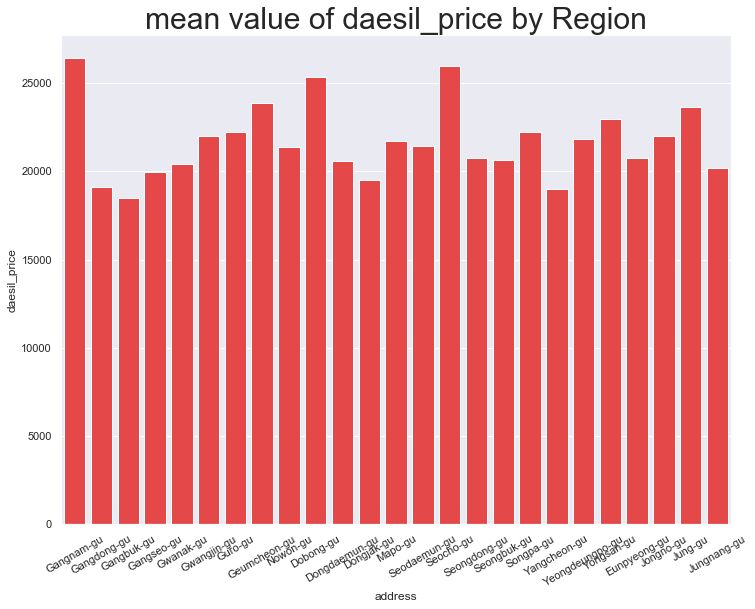

In [13]:
final = pd.DataFrame(
    {'address' : eng_address,
     'daesil_price' : pivot_mean['daesil_price'].values,
     'sukbak_price' : pivot_mean['sukbak_price'].values
    }
)

sns.set(rc={'figure.figsize' : (12, 9)})
daesil_graph = sns.barplot(data = final, x = "address", y= 'daesil_price', color =  "#FE2E2E")
daesil_graph.set_title("mean value of daesil_price by Region", fontsize = 30)
plt.xticks(rotation=30)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

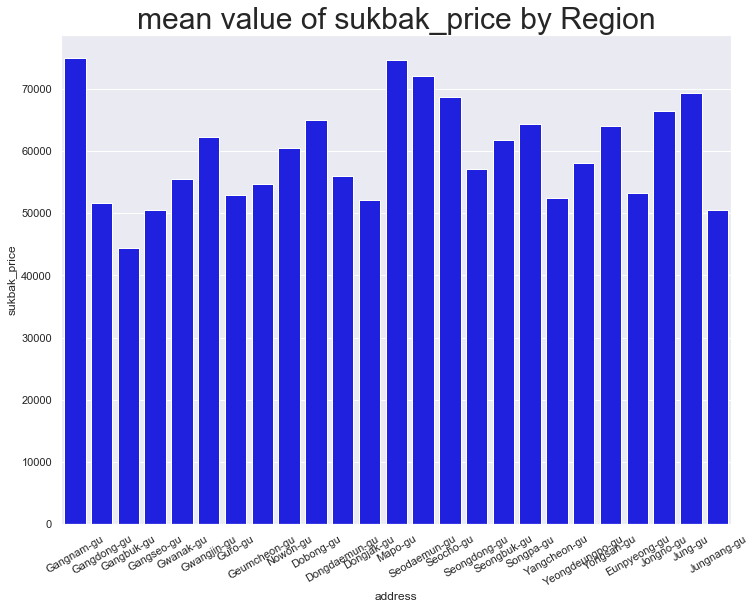

In [14]:
sukbak_graph = sns.barplot(data = final, x = "address", y= 'sukbak_price', color =  "blue")
sukbak_graph.set_title("mean value of sukbak_price by Region", fontsize = 30)
plt.xticks(rotation=30)

C:\Users\ASUS\Anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


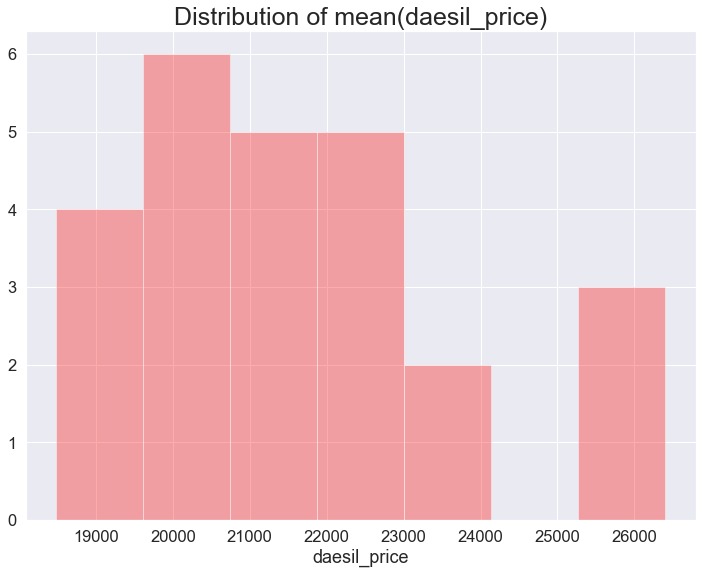

In [15]:
# 평균의 분포
sns.set(font_scale=1.5)
mean_daesil_dist = sns.distplot(final['daesil_price'], kde=False, color="#FE2E2E").set_title("Distribution of mean(daesil_price)",
                                                                             fontsize=25)


C:\Users\ASUS\Anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


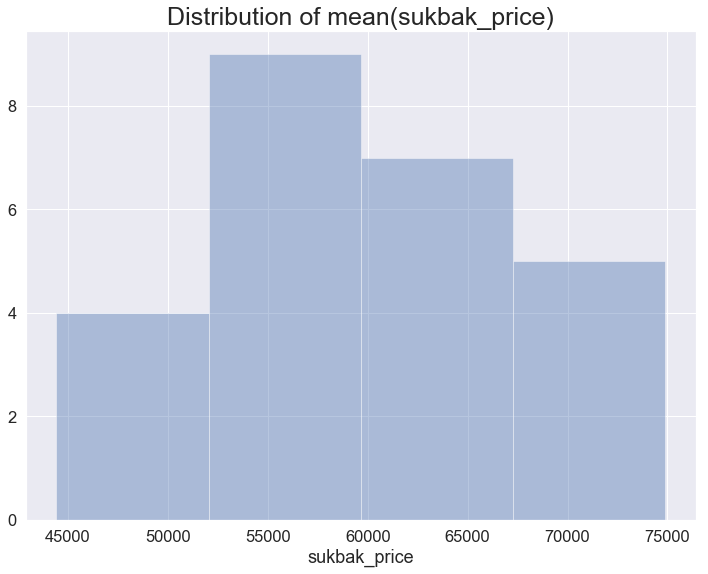

In [16]:
mean_sukbak_dist = sns.distplot(final['sukbak_price'], kde=False).set_title("Distribution of mean(sukbak_price)", fontsize=25)

C:\Users\ASUS\Anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'<Distribution of sukbak_price>')

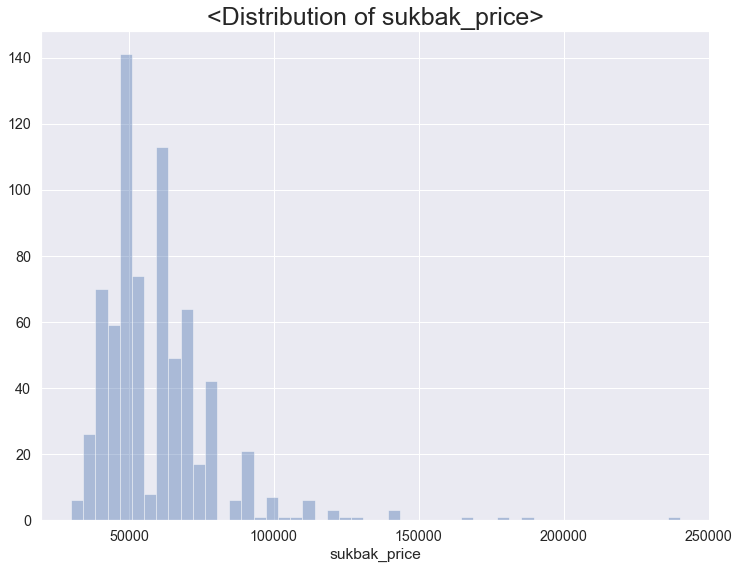

In [18]:
# 숙박 가격 전체의 분포
sns.set(font_scale=1.3)
hist_sukbak = sns.distplot(yanolja_1116_noNA['sukbak_price'], kde=False).set_title("<Distribution of sukbak_price>",
                                                                            fontsize= 25)
hist_sukbak

C:\Users\ASUS\Anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'<Distribution of daesil_price>')

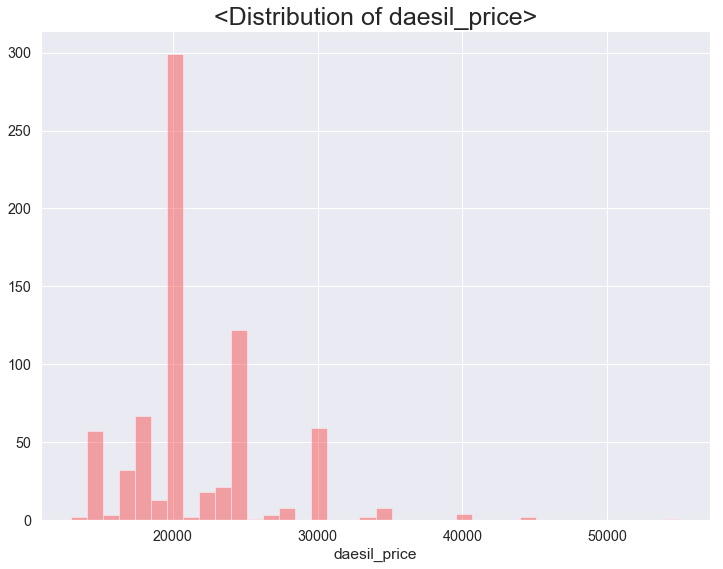

In [19]:
# 대실 가격 전체의 분포
sns.set(font_scale=1.3)
hist_daesil = sns.distplot(yanolja_1116_noNA['daesil_price'], kde=False , color="#FE2E2E").set_title("<Distribution of daesil_price>",
                                                                                      fontsize = 25)
hist_daesil

In [ ]:
# 지도 시각화

In [ ]:
svg = open('seoul_baby_map.svg', 'r').read()
soup = BeautifulSoup(svg)

paths = soup.findAll('path')

In [ ]:
final.head(5)

In [ ]:
final.describe()

In [ ]:
final.loc[final['address'] == 'Gangnam-gu']["sukbak_price"].values[0]

In [ ]:
colors = ["#F1EEF6", "#D489DA", "#C994C7", "980043"]

path_style = 'font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity;stroke-width:0.1;\
             stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt;marker-start:none;\
             stroke-linejoin:bevel;fill:'

print(paths)
# 숙박 가격에 따라 구별 색상 부여
for p in paths:
    if p['id'] in eng_address:
        try:
            value = final.loc[final['address'] == p['id']]["sukbak_price"].values[0]
        
        except:
            continue
    # 색상 부여 값의 범위
    if value > 50000:
        color_class = 3
    elif value > 45000:
        color_class = 2
    elif value > 40000:
        color_class = 1
    else:
        color_class = 0
    
    color = colors[color_class]
    p['style'] = path_style + color

soup.prettify
            
                

In [ ]:
# final -> csv로 저장
final.to_csv("1116_final.csv",mode = "w")